<a href="https://colab.research.google.com/github/Abdul-ur-Rehman-Butt/2022-SE-27_LAB_TASKS_ML/blob/main/lab_8__2022_SE_27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [15]:
heart_data = pd.read_csv('/content/heart.csv')

In [16]:
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [17]:
heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [18]:
heart_data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [19]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
le = LabelEncoder()
# Apply Label Encoding to specific columns
heart_data['RestingECG'] = le.fit_transform(heart_data['RestingECG'])
heart_data['Sex'] = le.fit_transform(heart_data['Sex'])
heart_data['ChestPainType'] = le.fit_transform(heart_data['ChestPainType'])
heart_data['ExerciseAngina'] = le.fit_transform(heart_data['ExerciseAngina'])
heart_data['ST_Slope'] = le.fit_transform(heart_data['ST_Slope'])
# Display the encoded DataFrame
print(heart_data)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  Hear

In [20]:
X =heart_data[['RestingECG','Cholesterol']]
y = heart_data['HeartDisease']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [21]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=100)

In [22]:
knn.predict(X_test)

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0])

In [23]:
accuracy_score(y_test,knn.predict(X_test))

0.5978260869565217

In [24]:
k_values = range(1, 50,2)

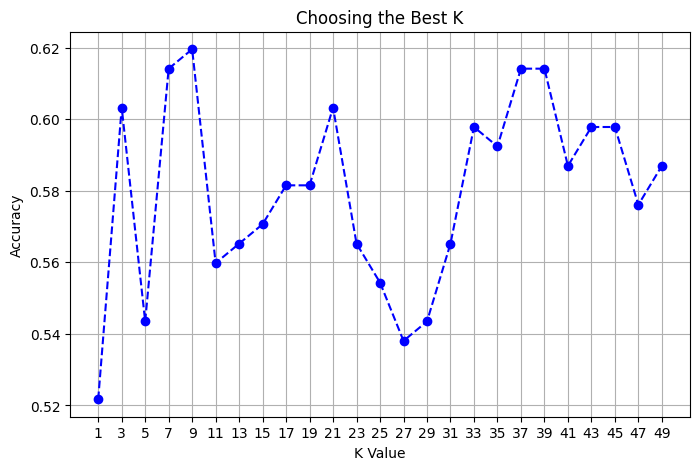

Best K: 9


<Figure size 640x480 with 0 Axes>

In [25]:
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Plot K vs Accuracy
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Choosing the Best K")
plt.xticks(k_values)
plt.grid(True)
plt.show()
plt.tight_layout()
# Find best K
best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best K: {best_k}")

***STANDARDIZTION AND NORMALIZATION***

In [26]:
# Apply normalization
normalizer = MinMaxScaler()
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)

In [28]:
# Apply standardization
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

In [29]:
# Function to train and evaluate KNN
def knn_classification(X_train, X_test, y_train, y_test, k=5):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report

In [30]:
# Perform KNN on normalized data
accuracy_norm, report_norm = knn_classification(X_train_normalized, X_test_normalized, y_train, y_test)


In [31]:
# Perform KNN on standardized data
accuracy_std, report_std = knn_classification(X_train_standardized, X_test_standardized, y_train, y_test)


In [32]:
# Display results
print("KNN Classification with Normalized Data:")
print(f"Accuracy: {accuracy_norm * 100:.2f}%")
print(report_norm)

print("\nKNN Classification with Standardized Data:")
print(f"Accuracy: {accuracy_std * 100:.2f}%")
print(report_std)


KNN Classification with Normalized Data:
Accuracy: 63.04%
              precision    recall  f1-score   support

           0       0.60      0.55      0.57        83
           1       0.65      0.69      0.67       101

    accuracy                           0.63       184
   macro avg       0.63      0.62      0.62       184
weighted avg       0.63      0.63      0.63       184


KNN Classification with Standardized Data:
Accuracy: 60.33%
              precision    recall  f1-score   support

           0       0.56      0.53      0.55        83
           1       0.63      0.66      0.65       101

    accuracy                           0.60       184
   macro avg       0.60      0.60      0.60       184
weighted avg       0.60      0.60      0.60       184

